<a href="https://colab.research.google.com/github/nupur1262/Geeksman_AISquad_Project1_NUPUR/blob/master/LOGO_COLAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**IMPORTING Kaggle.json FILE**

In [1]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


##**SETTING ENVIRONMENT VARIABLES**

In [2]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

##**DOWNLOADING THE DATASET FROM KAGGLE**

In [3]:
!kaggle datasets download -d nupurpahuja09/brand-logo

 77% 17.0M/22.2M [00:01<00:00, 11.6MB/s]
100% 22.2M/22.2M [00:01<00:00, 13.9MB/s]


##**UNZIPPING THE DOWNLOADED DATA**

In [4]:
!unzip "*.zip"

Archive:  brand-logo.zip
  inflating: test_data/1.jpg         
  inflating: test_data/10.jpg        
  inflating: test_data/100.jpg       
  inflating: test_data/101.jpg       
  inflating: test_data/102.jpg       
  inflating: test_data/103.jpg       
  inflating: test_data/104.jpg       
  inflating: test_data/105.jpg       
  inflating: test_data/106.jpg       
  inflating: test_data/107.jpg       
  inflating: test_data/108.jpg       
  inflating: test_data/109.jpg       
  inflating: test_data/11.jpg        
  inflating: test_data/110.jpg       
  inflating: test_data/111.jpg       
  inflating: test_data/112.jpg       
  inflating: test_data/113.jpg       
  inflating: test_data/114.jpg       
  inflating: test_data/115.jpg       
  inflating: test_data/116.jpg       
  inflating: test_data/117.jpg       
  inflating: test_data/118.jpg       
  inflating: test_data/119.jpg       
  inflating: test_data/12.jpg        
  inflating: test_data/121.jpg       
  inflating: test_data/12

##**IMPORTING REQUIRED LIBRARIES**

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

##**Creating data bunch object , which can further be trained**

In [10]:
path=""
tfms = get_transforms(do_flip=True, flip_vert=False, max_rotate=10.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75, )
data = ImageDataBunch.from_folder(Path("train_data"), train=".", valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

##**Exploring different classes present in data**

In [12]:
data.classes

['apple',
 'jio',
 'lenovo',
 'mi',
 'micromax',
 'nokia',
 'oneplus',
 'oppo',
 'sam',
 'vivo']

##**Looking at some examples in data**



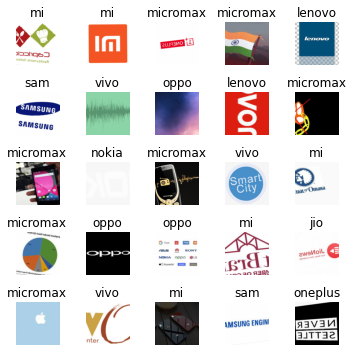

In [13]:
data.show_batch(rows=5, figsize=(5,5))

##***Creating a model to get trained***

**PARAMETERS:**

**data** Databunch we have created(converting data in a format so that it can be trained)

**models.resnet50** resnet50 model will be used.

**metrices** It just show accuracy after each epoch so that we can see how well our model is doing.

In [14]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [15]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

##**Training the model**

In [16]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,2.712201,1.961055,0.508257,00:30
1,2.205200,1.872722,0.530275,00:30
2,1.872778,1.554205,0.568807,00:30
3,1.568204,1.438655,0.574312,00:30
4,1.311868,1.414855,0.572477,00:31
5,1.120467,1.359251,0.587156,00:30
6,0.975448,1.323125,0.612844,00:30
7,0.881306,1.322451,0.605505,00:31


In [18]:
learn.save('stage-1')

In [19]:
learn.unfreeze()

In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.022028,2.235839,0.425688,00:30
1,1.238844,1.917569,0.565138,00:30
2,1.033588,1.173787,0.638532,00:30
3,0.775571,1.150973,0.671560,00:30


In [21]:
learn.save('stage-1')

In [22]:
learn.load('stage-1');

#***Results***

In [23]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

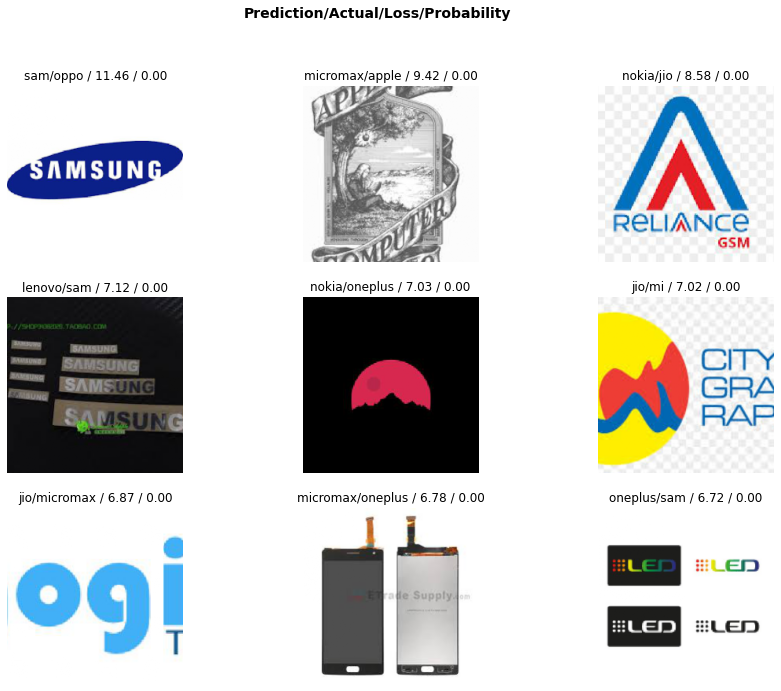

In [25]:
interp.plot_top_losses(9, figsize=(15,11))

##**Plotting** **Confusion** **Matrix**

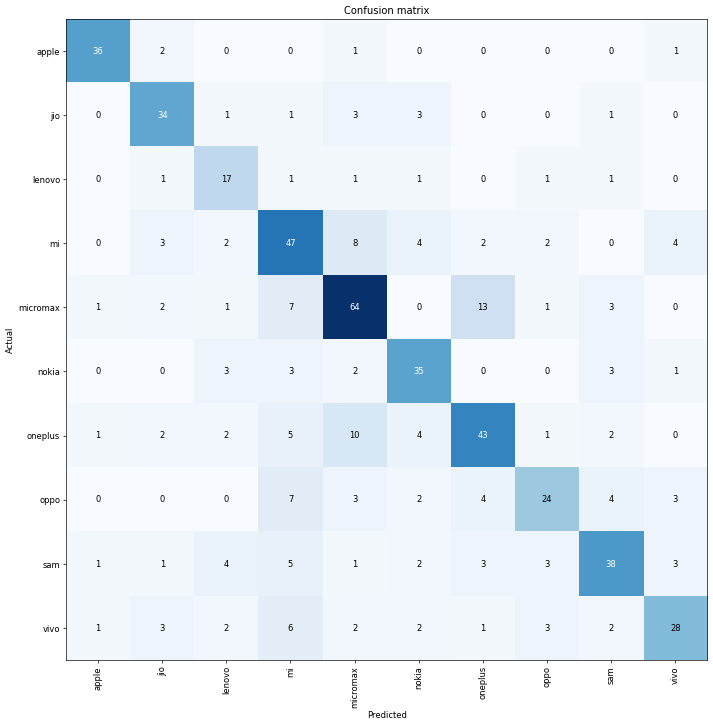

In [26]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


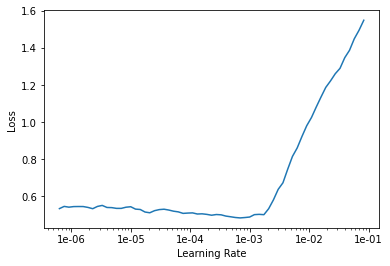

In [28]:
learn.recorder.plot()

In [29]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.530525,1.134669,0.675229,00:30
1,0.492833,1.131076,0.673395,00:30


In [30]:
learn.save('stage-1')

##**Mounting Google Drive**

In [31]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


##**Making a Folder to save the Project**

In [32]:
os.makedirs("/content/drive/My Drive/BRAND-LOGO/logo_recognition",exist_ok=True)

##**Saving our directory path to a variable so that we don"t have to write the code everytime to refer to the directory.**

In [33]:
my_dir="/content/drive/My Drive/BRAND-LOGO/logo_recognition"

##**Saving the state with name as stage-1 in Google drive directory..**

In [ ]:
learn.save(my_dir+"/Stage-1")

In [ ]:
learn.load("/content/drive/My Drive/BRAND-LOGO/logo_recognition/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (2318 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
jio,jio,jio,jio,jio
Path: .;

Valid: LabelList (579 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
mi,mi,sam,mi,mi
Path: .;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size

In [ ]:
learn.export(my_dir+"/export.pkl")

##**Saving the .pth and .pkl File in the Colab Notebook Itself.**

In [34]:
os.makedirs("/content/export_values",exist_ok=True)
my_path = "/content/export_values"
learn.save(my_path+"/Stage-1")
learn.export(my_path+"/export.pkl")

##**Uploading the .pkl File to the Kora-Drive so that we can use the link afterwards in the Prediction Function.**

In [35]:
!pip install -U kora

In [36]:
from kora.drive import upload_public
url2 = upload_public('/content/export_values/export.pkl')
url2

'https://drive.google.com/uc?id=1cw8_PkwVfT58CIYmkdmvueKVZtRVhZzl'